In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os

from pathlib import Path
from typing import Union
from collections import defaultdict
from sqlalchemy import create_engine


In [2]:
# see website for information:
# https://developer.nrel.gov/docs/transportation/alt-fuel-stations-v1/all/

api_key = 'AWMepE53xJxr8Qu8yP3w6J6PLAf3ye6sO7Fsdvlc'
base_url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json'

# List of state codes
state_codes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
               'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
               'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Variable to store the total number of electric vehicle stations in the US
total_stations_us = 0

# Dictionary to store the totals for each state
state_totals = {}

for state_code in state_codes:
    query_params = {
        'fuel_type_code': 'ELEC',
        'state': state_code,
        'country': 'US',
        'api_key': api_key
    }

    # Make the API request
    response = requests.get(base_url, params=query_params)

    # Parse the JSON response
    data = response.json()

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Get the total number of electric vehicle stations for the specified state
        total_stations = data.get('total_results', 0)

        # Increment the total stations in the US variable
        total_stations_us += total_stations

        # Store the result in the dictionary
        state_totals[state_code] = total_stations

    else:
        # Print an error message if the request was not successful
        print(f'Error: {response.status_code} - {response.text}')

# Sort the dictionary by state in decreasing order based on total stations
sorted_totals = dict(sorted(state_totals.items(), key=lambda item: item[1], reverse=True))

# Create a folder named 'data_query' if it doesn't exist
output_folder = 'data_query'
os.makedirs(output_folder, exist_ok=True)

# Save the sorted totals to a JSON file in the 'data_query' folder
state_data_file_path = os.path.join(output_folder, 'electric_stations_by_state.json')
with open(state_data_file_path, 'w', encoding='utf-8') as state_data_file:
    json.dump(sorted_totals, state_data_file, ensure_ascii=False, indent=4)

# Print the total number of electric vehicle stations in the US
print(f'Total electric vehicle stations in the US for fuel type ELEC: {total_stations_us}')

print(f'The sorted totals have been saved to: {state_data_file_path}')


Total electric vehicle stations in the US for fuel type ELEC: 79662
The sorted totals have been saved to: data_query\electric_stations_by_state.json


In [3]:
api_key = 'AWMepE53xJxr8Qu8yP3w6J6PLAf3ye6sO7Fsdvlc'
base_url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json'

# List of all US state codes
state_codes = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
    'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# List of attributes to retrieve, including the new ones
attributes_to_retrieve = [
    'id', 'station_name', 'street_address', 'city', 'state', 'zip',
    'latitude', 'longitude', 'owner_type_code', 'ev_connector_types', 'ev_pricing',
    'geocode_status', 'access_code', 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse'
]

# List to store detailed information for stations meeting the criteria
filtered_stations = []

for state_code in state_codes:
    query_params = {
        'fuel_type_code': 'ELEC',
        'state': state_code,
        'country': 'US',
        'restricted_access': 'false',  # Add restricted_access parameter
        'api_key': api_key
    }

    # Make the API request
    response = requests.get(base_url, params=query_params)

    # Parse the JSON response
    data = response.json()

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Add detailed information for each station meeting the criteria
        filtered_stations.extend([
            {attr: station[attr] for attr in attributes_to_retrieve}
            for station in data.get('fuel_stations', [])
        ])

    else:
        # Print an error message if the request was not successful
        print(f'Error: {response.status_code} - {response.text}')

# Print the total count of electric vehicle stations in the US after filtering
total_us_stations = sum(len(data.get('fuel_stations', [])) for state_code in state_codes)
print(f'Total electric vehicle stations in the US after filtering: {total_us_stations}')

# Create a folder named 'data_query' if it doesn't exist
output_folder = 'data_query'
os.makedirs(output_folder, exist_ok=True)

# Save the filtered stations to a JSON file in the 'data_query' folder
output_file_path = os.path.join(output_folder, 'filtered_stations_attributes.json')
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    json.dump(filtered_stations, output_file, ensure_ascii=False, indent=4)
    
    
print(f'The filtered stations with specified attributes have been saved to: {output_file_path}')
        

Total electric vehicle stations in the US after filtering: 7100
The filtered stations with specified attributes have been saved to: data_query\filtered_stations_attributes.json


In [4]:
# Read in JSON previously created from API request
output_file_path = Path("data_query/filtered_stations_attributes.json")

# Load data from the JSON file
if output_file_path.exists():
    with output_file_path.open("r", encoding="utf8") as f:
        station_data = json.load(f)

# Create a DataFrame from the loaded data
station_df = pd.DataFrame(station_data)

# Organize the columns in the specified sequence
station_df = station_df[['id', 'station_name', 'street_address', 'city', 'state', 'zip',
         'latitude', 'longitude', 'owner_type_code', 'ev_connector_types', 'ev_pricing',
         'geocode_status', 'access_code', 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse']]

# Display the DataFrame
# print(station_df.columns)

station_df.head()


,id,station_name,street_address,city,state,zip,latitude,longitude,owner_type_code,ev_connector_types,ev_pricing,geocode_status,access_code,ev_level1_evse_num,ev_level2_evse_num,ev_dc_fast_num,ev_other_evse
0,17,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,36107,32.367916,-86.267021,T,None,None,200-9,private,NaN,NaN,NaN,None
1,597,Spire,2828 Dauphin St,Mobile,AL,36606,30.689832,-88.108861,T,None,None,200-9,private,NaN,NaN,NaN,None
2,13712,Gala Gas Co Inc,54 Old US Highway 82,Eufaula,AL,36027,31.912022,-85.150318,P,None,None,GPS,private,NaN,NaN,NaN,None
3,13723,Superior Gas,421 Noble St,Anniston,AL,36201,33.642079,-85.828466,P,None,None,GPS,public,NaN,NaN,NaN,None
4,13725,Superior Gas,702 Memorial Dr,Piedmont,AL,36272,33.921589,-85.620314,P,None,None,200-9,public,NaN,NaN,NaN,None


In [5]:
api_key = 'AWMepE53xJxr8Qu8yP3w6J6PLAf3ye6sO7Fsdvlc'
base_url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json'

# Set the state parameter to 'CA' for California
state_code = 'CA'

# List of attributes to retrieve for map plotting
attributes_to_retrieve = [
    'id', 'station_name', 'street_address', 'city', 'state', 'zip',
    'latitude', 'longitude', 'owner_type_code', 'ev_connector_types', 'ev_pricing',
    'geocode_status', 'access_code'
]

# List to store detailed information for stations meeting the criteria
filtered_stations = []

query_params = {
    'fuel_type_code': 'ELEC',
    'state': state_code,
    'country': 'US',
    'restricted_access': 'false',  
    'api_key': api_key
}

# Make the API request
response = requests.get(base_url, params=query_params)

# Parse the JSON response
data = response.json()

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Add detailed information for each station meeting the criteria
    for station in data.get('fuel_stations', []):
        # Check if all essential attributes have usable values
        if all(
            station.get(attr) is not None and station.get(attr) != ''
            for attr in attributes_to_retrieve
        ):
            # Combine 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse'
            evse_combined = {
                'evse_combined': {
                    'ev_level1': station.get('ev_level1_evse_num', 0),
                    'ev_level2': station.get('ev_level2_evse_num', 0),
                    'ev_dc_fast': station.get('ev_dc_fast_num', 0),
                    'ev_other': station.get('ev_other_evse', 0)
                }
            }
            station.update(evse_combined)

            # Remove the individual evse attributes from the station
            for evse_attr in ['ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse']:
                del station[evse_attr]

            filtered_stations.append({attr: station[attr] for attr in attributes_to_retrieve})

else:
    # Print an error message if the request was not successful
    print(f'Error: {response.status_code} - {response.text}')

# Create a DataFrame from the loaded data
df = pd.DataFrame(filtered_stations)

# Display the DataFrame
print(df)

# Print the total count of electric vehicle stations in California after filtering
total_ca_stations = len(df)
print(f'Total electric vehicle stations in California after filtering: {total_ca_stations}')

# Create a folder named 'data_query' if it doesn't exist
output_folder = 'data_query'
os.makedirs(output_folder, exist_ok=True)

# Save the filtered stations to a JSON file in the 'data_query' folder
output_file_path = os.path.join(output_folder, 'filtered_stations_combined_evse_CA.json')
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    json.dump(filtered_stations, output_file, ensure_ascii=False, indent=4)

print(f'The filtered stations with combined EVSE attributes in California have been saved to: {output_file_path}')


          id                                   station_name  \
0       1523                  Los Angeles Convention Center   
1       1556                            LADWP - Sylmar West   
2       1573                         LADWP - Fairfax Center   
3       1583                 California Air Resources Board   
4       6355                         Scripps Green Hospital   
...      ...                                            ...   
1763  323695  El Dorado County Department of Transportation   
1764  323696                             Georgetown Library   
1765  323697                 El Dorado County Senior Center   
1766  323703                                 7Charge - Napa   
1767  323706                         7Charge - Walnut Creek   

               street_address          city state    zip   latitude  \
0          1201 S Figueroa St   Los Angeles    CA  90015  34.040539   
1        13201 Sepulveda Blvd        Sylmar    CA  91342  34.303090   
2          2311 S Fairfax Ave 

In [6]:
df.head()

,id,station_name,street_address,city,state,zip,latitude,longitude,owner_type_code,ev_connector_types,ev_pricing,geocode_status,access_code
0,1523,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,34.040539,-118.271387,P,[J1772],Free; parking fee,GPS,public
1,1556,LADWP - Sylmar West,13201 Sepulveda Blvd,Sylmar,CA,91342,34.303090,-118.480505,LG,[J1772],Free,200-8,private
2,1573,LADWP - Fairfax Center,2311 S Fairfax Ave,Los Angeles,CA,90016,34.036777,-118.368841,LG,[J1772],Free,200-8,private
3,1583,California Air Resources Board,9530 Telstar Ave,El Monte,CA,91731,34.068720,-118.064000,SG,[J1772],Free,GPS,public
4,6355,Scripps Green Hospital,10666 N Torrey Pines Rd,La Jolla,CA,92037,32.899470,-117.243000,P,[J1772],Free; parking fee,GPS,public


In [7]:
api_key = 'AWMepE53xJxr8Qu8yP3w6J6PLAf3ye6sO7Fsdvlc'
base_url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json'

# Set the state parameter to 'TX' for Texas
state_code = 'TX'

# List of attributes to retrieve for map plotting
attributes_to_retrieve = [
    'id', 'station_name', 'street_address', 'city', 'state', 'zip',
    'latitude', 'longitude', 'owner_type_code', 'ev_connector_types', 'ev_pricing',
    'geocode_status', 'access_code'
]

# List to store detailed information for stations meeting the criteria in Texas
filtered_stations_tx = []

query_params = {
    'fuel_type_code': 'ELEC',
    'state': state_code,
    'country': 'US',
    'restricted_access': 'false',  
    'api_key': api_key
}

# Make the API request
response = requests.get(base_url, params=query_params)

# Parse the JSON response
data = response.json()

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Add detailed information for each station meeting the criteria in Texas
    for station in data.get('fuel_stations', []):
        # Check if all essential attributes have usable values
        if all(
            station.get(attr) is not None and station.get(attr) != ''
            for attr in attributes_to_retrieve
        ):
            # Combine 'ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse'
            evse_combined = {
                'evse_combined': {
                    'ev_level1': station.get('ev_level1_evse_num', 0),
                    'ev_level2': station.get('ev_level2_evse_num', 0),
                    'ev_dc_fast': station.get('ev_dc_fast_num', 0),
                    'ev_other': station.get('ev_other_evse', 0)
                }
            }
            station.update(evse_combined)

            # Remove the individual evse attributes from the station
            for evse_attr in ['ev_level1_evse_num', 'ev_level2_evse_num', 'ev_dc_fast_num', 'ev_other_evse']:
                del station[evse_attr]

            filtered_stations_tx.append({attr: station[attr] for attr in attributes_to_retrieve})

else:
    # Print an error message if the request was not successful
    print(f'Error: {response.status_code} - {response.text}')

# Create a DataFrame from the loaded data for Texas
df_tx = pd.DataFrame(filtered_stations_tx)

# Display the DataFrame for Texas
print(df_tx)

# Print the total count of electric vehicle stations in Texas after filtering
total_tx_stations = len(df_tx)
print(f'Total electric vehicle stations in Texas after filtering: {total_tx_stations}')

# Create a folder named 'data_query' 
output_folder = 'data_query'
os.makedirs(output_folder, exist_ok=True)

# Save the filtered stations in Texas to a JSON file in the 'data_query' folder
output_file_path_tx = os.path.join(output_folder, 'filtered_stations_combined_evse_TX.json')
with open(output_file_path_tx, 'w', encoding='utf-8') as output_file_tx:
    json.dump(filtered_stations_tx, output_file_tx, ensure_ascii=False, indent=4)

print(f'The filtered stations with combined EVSE attributes in Texas have been saved to: {output_file_path_tx}')


         id                                  station_name  \
0     39114                            Clay Cooley Nissan   
1     39708                     McGavock Nissan - Abilene   
2     39709                    McGavock Nissan - Amarillo   
3     39710                              Don Davis Nissan   
4     39711                             Town North Nissan   
..      ...                                           ...   
605  320142        Ramada by Wyndham - Tesla Supercharger   
606  320149         Ramada by Wyndham - Tesla Destination   
607  323261  CEFCO Convenience Store - Tesla Supercharger   
608  323262  718 Broadway St Parking - Tesla Supercharger   
609  323264                 Circle K - Tesla Supercharger   

             street_address              city state    zip   latitude  \
0              4914 S IH-35            Austin    TX  78745  30.206330   
1      818 E Overland Trail           Abilene    TX  79606  32.408909   
2           4700 S Soncy Rd          Amarillo   

In [8]:
df_tx.head()

,id,station_name,street_address,city,state,zip,latitude,longitude,owner_type_code,ev_connector_types,ev_pricing,geocode_status,access_code
0,39114,Clay Cooley Nissan,4914 S IH-35,Austin,TX,78745,30.206330,-97.759360,P,"[CHADEMO, J1772]",Free,200-8,public
1,39708,McGavock Nissan - Abilene,818 E Overland Trail,Abilene,TX,79606,32.408909,-99.771463,P,[J1772],Free,200-9,public
2,39709,McGavock Nissan - Amarillo,4700 S Soncy Rd,Amarillo,TX,79119,35.159354,-101.938937,P,[J1772],Free,200-9,public
3,39710,Don Davis Nissan,1320 E Interstate 20,Arlington,TX,76018,32.676458,-97.087169,P,[J1772],Free,200-9,public
4,39711,Town North Nissan,9160A Research Blvd,Austin,TX,78758,30.374542,-97.731445,P,"[CHADEMO, J1772, J1772COMBO]",Free,200-9,public


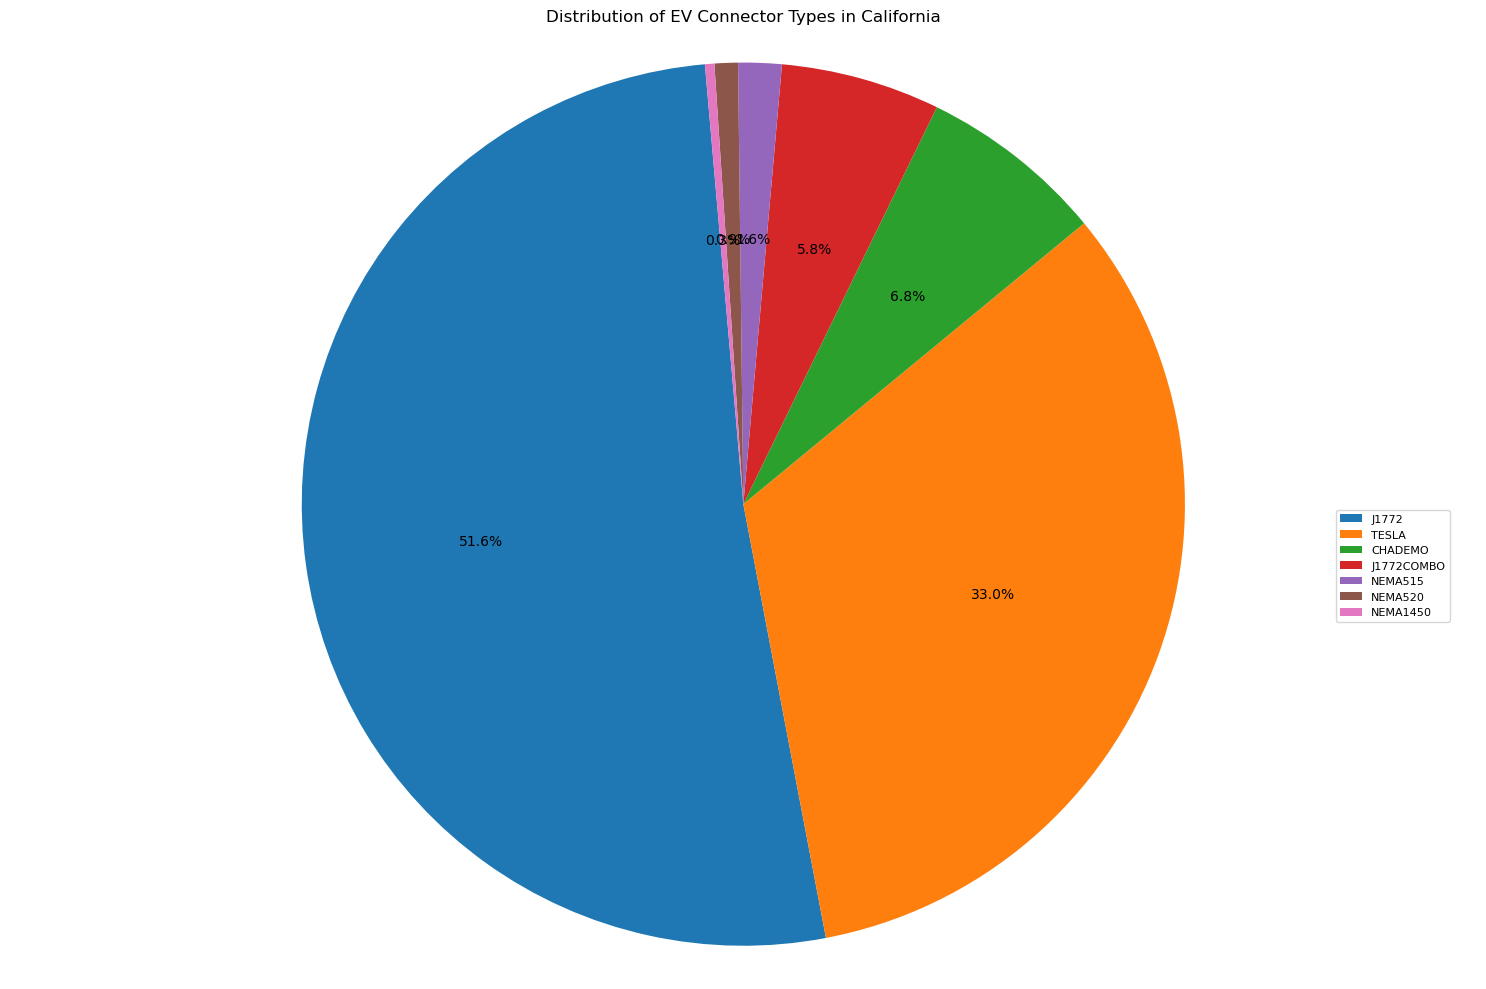

In [25]:
# Count the occurrences of each ev_connector_type
connector_type_counts = df['ev_connector_types'].explode().value_counts()

# Plot the pie chart
myexplode = [0, 0, 0, 0, 0, 0, 0.]
plt.figure(figsize=(15, 10))
patches, texts, autotexts = plt.pie(connector_type_counts,  startangle=95, autopct='%1.1f%%', explode=myexplode, labels=None, pctdistance=0.6)
#
labels = connector_type_counts.index

# Add legend
plt.legend(labels, loc='upper left', bbox_to_anchor=(0.9, 0.5), fontsize=8)

plt.title('Distribution of EV Connector Types in California')
plt.axis('equal')
plt.tight_layout()
plt.show()

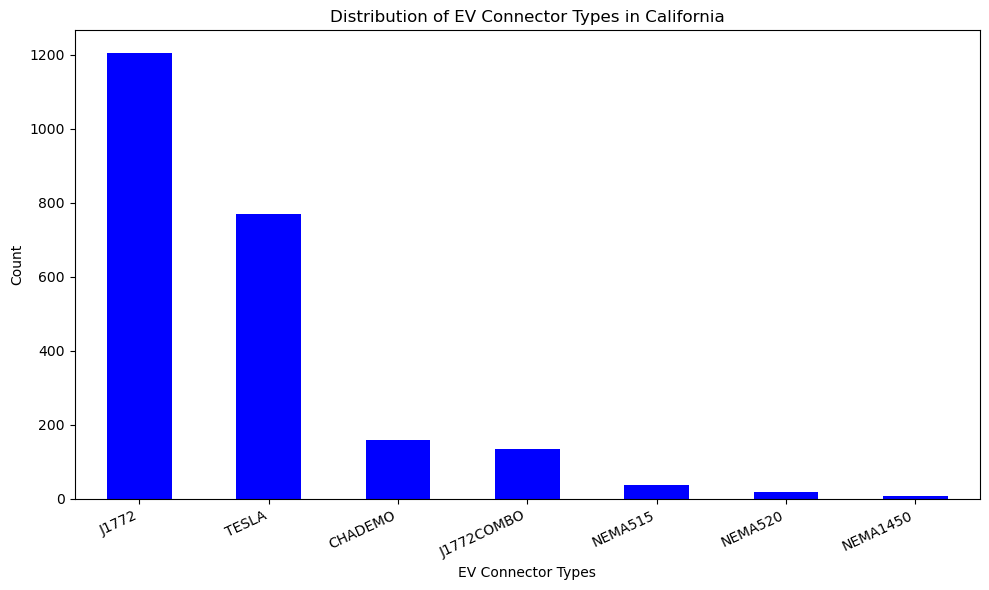

In [10]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
connector_type_counts.plot(kind='bar', color='blue')
plt.xlabel('EV Connector Types')
plt.ylabel('Count')
plt.title('Distribution of EV Connector Types in California')
plt.xticks(rotation=25, ha='right')  
plt.tight_layout()
plt.show()

In [11]:
# data for California
ca_file_path = 'data_query/filtered_stations_combined_evse_CA.json'
with open(ca_file_path, 'r', encoding='utf-8') as ca_file:
    ca_data = json.load(ca_file)

# data for Texas
tx_file_path = 'data_query/filtered_stations_combined_evse_TX.json'
with open(tx_file_path, 'r', encoding='utf-8') as tx_file:
    tx_data = json.load(tx_file)

# Total number of electric vehicle stations in CA and TX
total_ca_stations = len(ca_data)
total_tx_stations = len(tx_data)


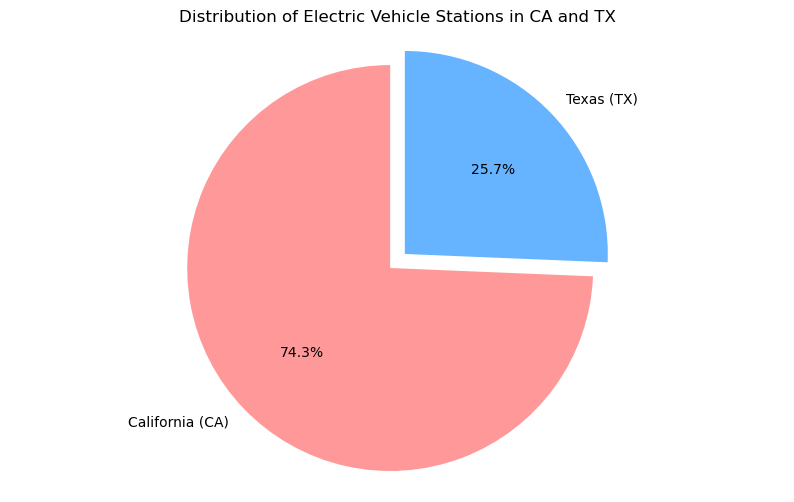

In [12]:
# Pie chart to show the distribution of electric vehicle stations in California (CA) and Texas (TX).
labels = ['California (CA)', 'Texas (TX)']
sizes = [total_ca_stations, total_tx_stations]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, wedgeprops=dict(linewidth=0))
plt.title('Distribution of Electric Vehicle Stations in CA and TX')
plt.axis('equal')  
plt.show()


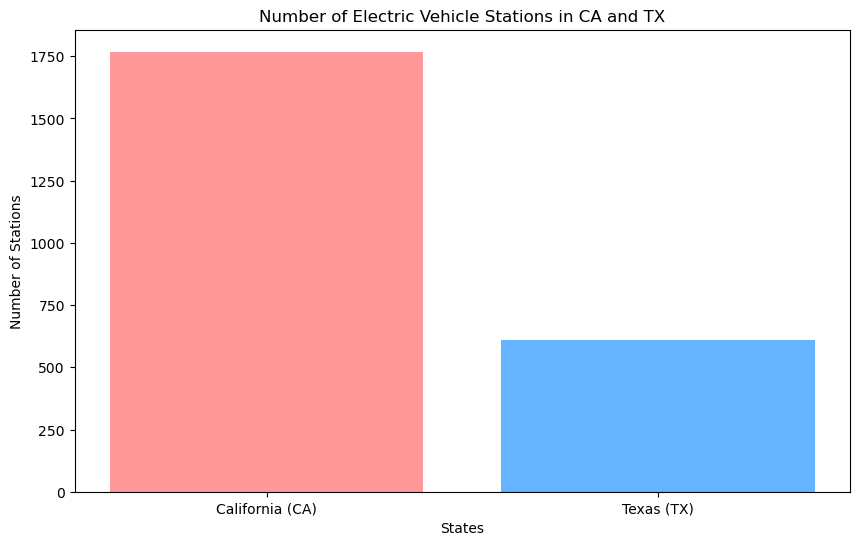

In [13]:
# Bar chart to compares the number of electric vehicle stations in California (CA) and Texas (TX).
states = ['California (CA)', 'Texas (TX)']
stations_count = [total_ca_stations, total_tx_stations]

plt.figure(figsize=(10, 6))
plt.bar(states, stations_count, color=['#ff9999', '#66b3ff'])
plt.title('Number of Electric Vehicle Stations in CA and TX')
plt.xlabel('States')
plt.ylabel('Number of Stations')
plt.show()